<a href="https://colab.research.google.com/github/ghn9zh/ds3001-HW5/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

In [ ]:
! git clone https://github.com/ds4e/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 6), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 7.16 MiB | 8.13 MiB/s, done.
Resolving deltas: 100% (6/6), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
#Part 1 and 2:
import pandas as pd
file_path='/content/visualization/assignment/data/college_completion.csv'
df=pd.read_csv(file_path)

df_shape = df.shape
df_columns = df.columns.tolist()
df_head = df.head()
df_head

#3,798 observtions (rows) and 63 variables (columns)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
#Part 3:
control_level_crosstab=pd.crosstab(df['control'],df['level'])
control_level_crosstab

#Public institutions dominate the 2-year programs making up the majorty
#Private not-for-profit instituations mainly offer 4-year programs
#Private for-profit institutions are more evenly split but slightly favor 4-yr
#Private not-for-profit has the biggest margin by far between 2-yr and 4-yr

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


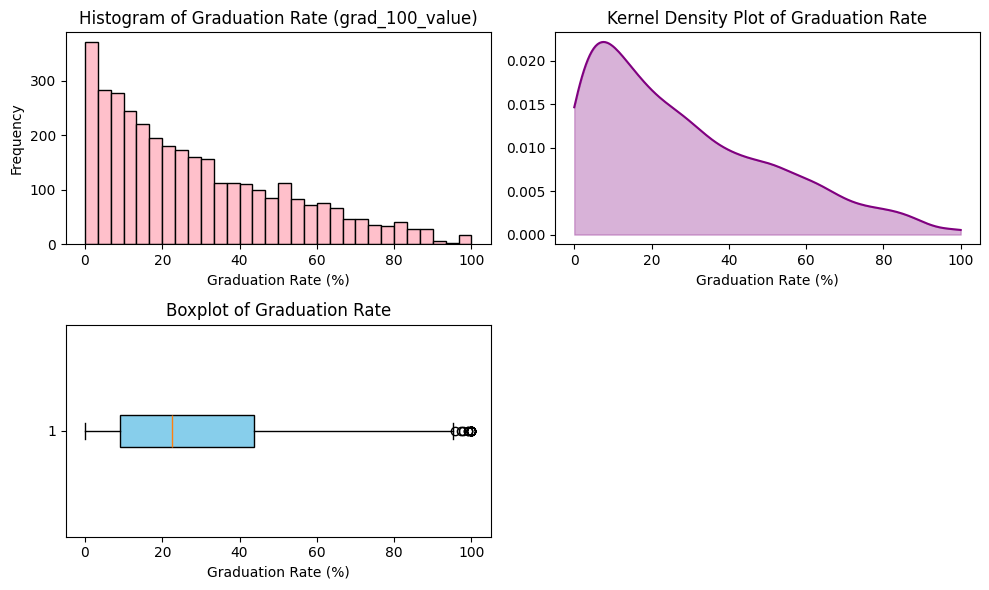

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [ ]:
#Part 4: EDA for grad_100_value

import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

grad_100_clean=df['grad_100_value'].dropna()
plt.figure(figsize=(10, 6))

#Histogram
plt.subplot(2, 2, 1)
plt.hist(grad_100_clean, bins=30, color='pink', edgecolor='black')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Graduation Rate (grad_100_value)')

#Kernel Density Plot
plt.subplot(2, 2, 2)
density = gaussian_kde(grad_100_clean)
xs = np.linspace(grad_100_clean.min(), grad_100_clean.max(), 200)
plt.plot(xs, density(xs), color='purple')
plt.fill_between(xs, density(xs), color='purple', alpha=0.3)
plt.xlabel('Graduation Rate (%)')
plt.title('Kernel Density Plot of Graduation Rate')

#Boxplot
plt.subplot(2,2,3)
plt.boxplot(grad_100_clean, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.xlabel('Graduation Rate (%)')
plt.title('Boxplot of Graduation Rate')

#Statistical Description
grad_100_stats = grad_100_clean.describe()
plt.tight_layout()
plt.show()

print(grad_100_stats)



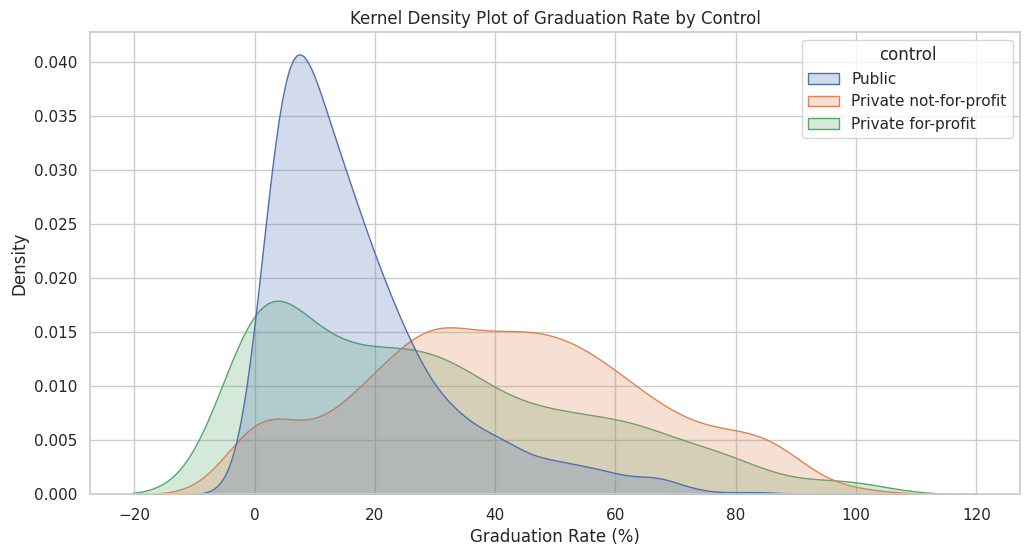

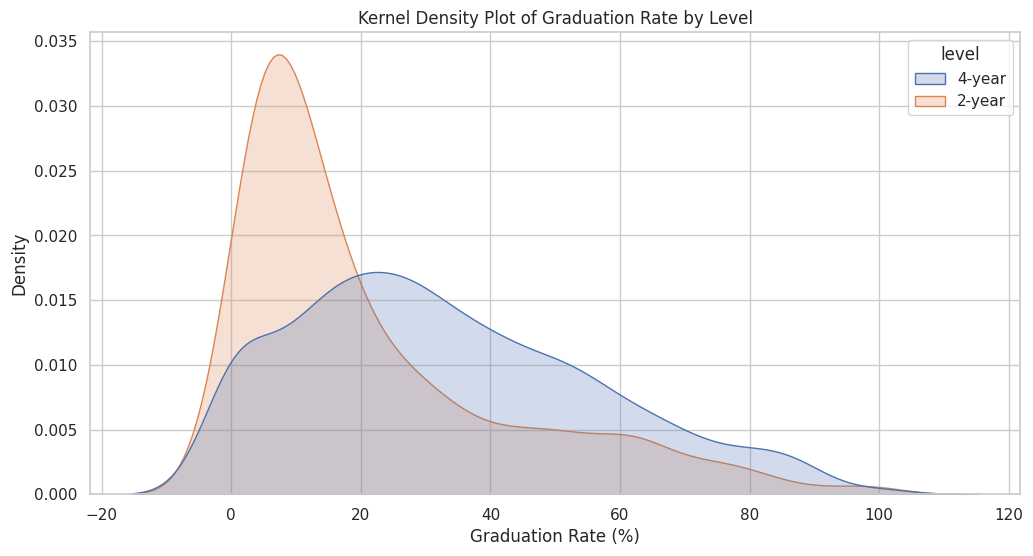

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [ ]:
#Part 5: Using control and level
import seaborn as sns
sns.set(style="whitegrid")

#Grouped KDP by Control
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True, common_norm=False)
plt.xlabel('Graduation Rate (%)')
plt.title('Kernel Density Plot of Graduation Rate by Control')
plt.show()

#Grouped KDP by 'level'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True, common_norm=False)
plt.xlabel('Graduation Rate (%)')
plt.title('Kernel Density Plot of Graduation Rate by Level')
plt.show()

#Stats by Control
control_stats = df.groupby('control')['grad_100_value'].describe()
print(control_stats)

#Stats by Level
level_stats = df.groupby('level')['grad_100_value'].describe()
print(level_stats)

Part 5 description:
In Part 5, the kernel density plots reveal that Private not-for-profit institutions generally have the highest graduation rates, while Public and Private for-profit institutions show lower peaks, indicating lower graduation rates overall. Additionally, 4-year institutions consistently outperform 2-year institutions in graduation rates, with a broader distribution skewed toward higher percentages. Therefore, 4-year Private not-for-profit institutions appear to have the best graduation rates among all institution types.

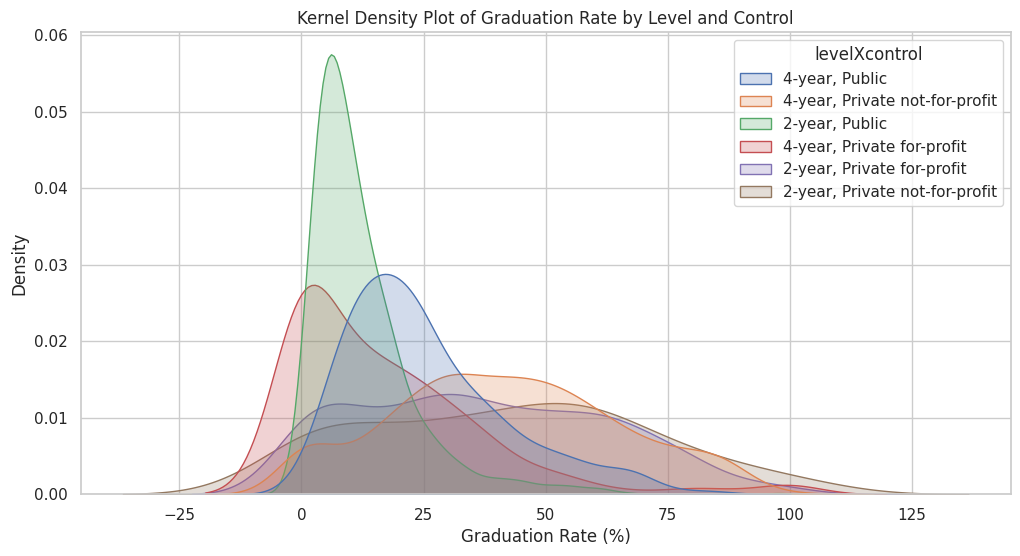

                                 count       mean        std  min     25%  \
levelXcontrol                                                               
2-year, Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
2-year, Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
2-year, Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year, Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
4-year, Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
4-year, Public                   573.0  25.561082  16.403902  0.0  13.600   

                                 50%     75%    max  
levelXcontrol                                        
2-year, Private for-profit      33.9  57.800  100.0  
2-year, Private not-for-profit  44.4  61.200  100.0  
2-year, Public                   9.4  16.175   97.8  
4-year, Private for-profit      12.5  26.325  100.0  
4-year, Private not-for-profit  41.0  57.800  100.0  
4-yea

In [ ]:
#Part 6
df['levelXcontrol']=df['level']+', '+df['control']

#KDP for Grad rate by LevelxControl
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True, common_norm=False)
plt.xlabel('Graduation Rate (%)')
plt.title('Kernel Density Plot of Graduation Rate by Level and Control')
plt.show()

#Stats by Level and Control
level_control_stats = df.groupby('levelXcontrol')['grad_100_value'].describe()
print(level_control_stats)

#The best graduation rates are 4-yr private not-for-profit


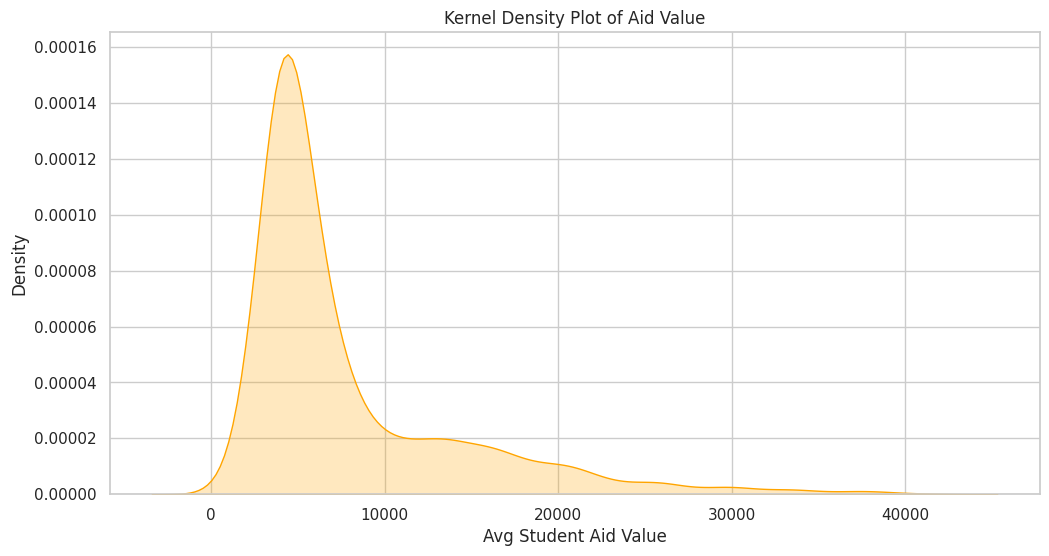

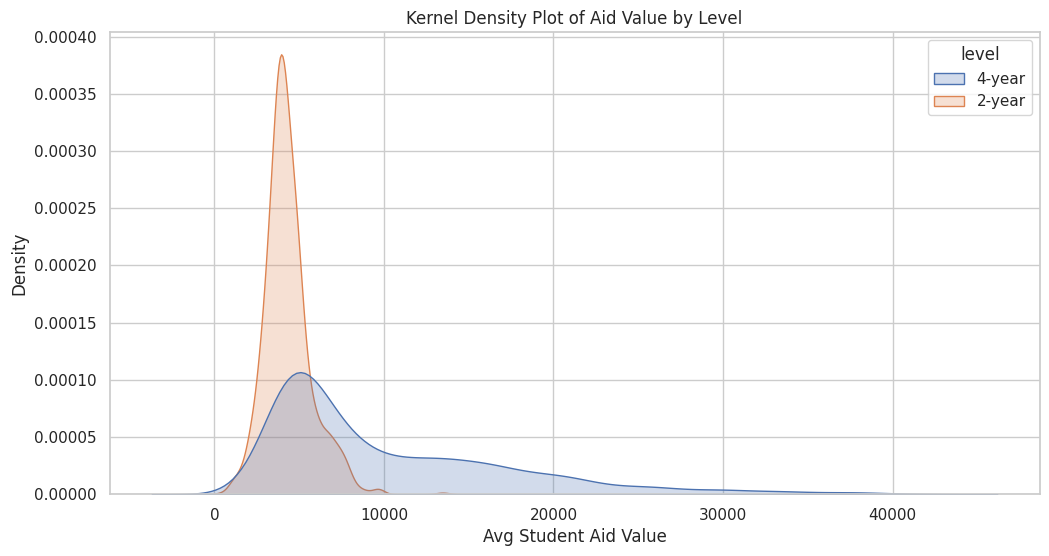

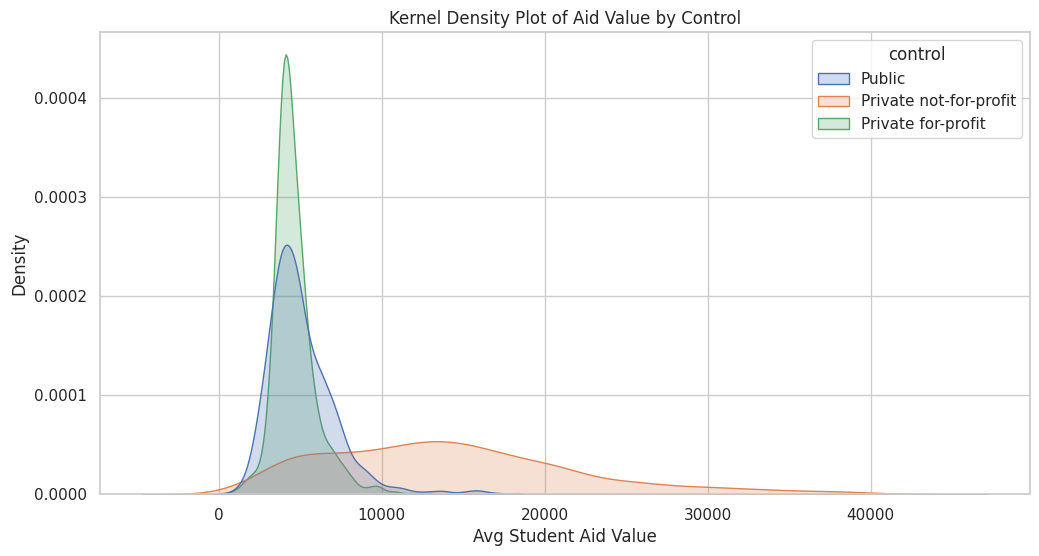

         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   

In [ ]:
#Part 7: Aid across type

#KDP for aid value
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='aid_value', fill=True, color='orange')
plt.xlabel('Avg Student Aid Value')
plt.title('Kernel Density Plot of Aid Value')
plt.show()

#Grouped KDP by Level
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='aid_value', hue='level', fill=True, common_norm=False)
plt.xlabel('Avg Student Aid Value')
plt.title('Kernel Density Plot of Aid Value by Level')
plt.show()

#Grouped KDP by contronl
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='aid_value', hue='control', fill=True, common_norm=False)
plt.xlabel('Avg Student Aid Value')
plt.title('Kernel Density Plot of Aid Value by Control')
plt.show()

#Stats by Level
level_stats = df.groupby('level')['aid_value'].describe()
control_stats = df.groupby('control')['aid_value'].describe()
print(level_stats)
print(control_stats)

#The shape of the graph is influenced by many factors such as tution costs and
#funding policies, which leads to heigher aid amounts in private not-for-profit
#institutions compared to public or private for profit-schools.

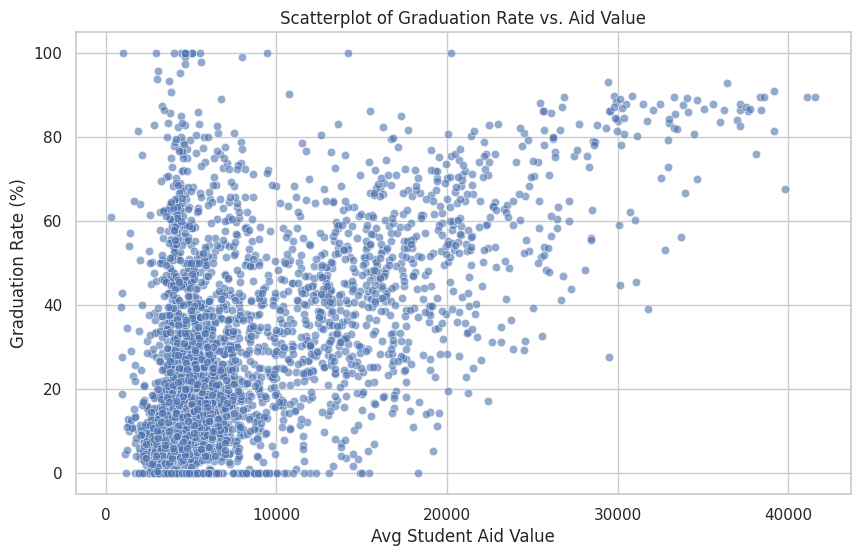

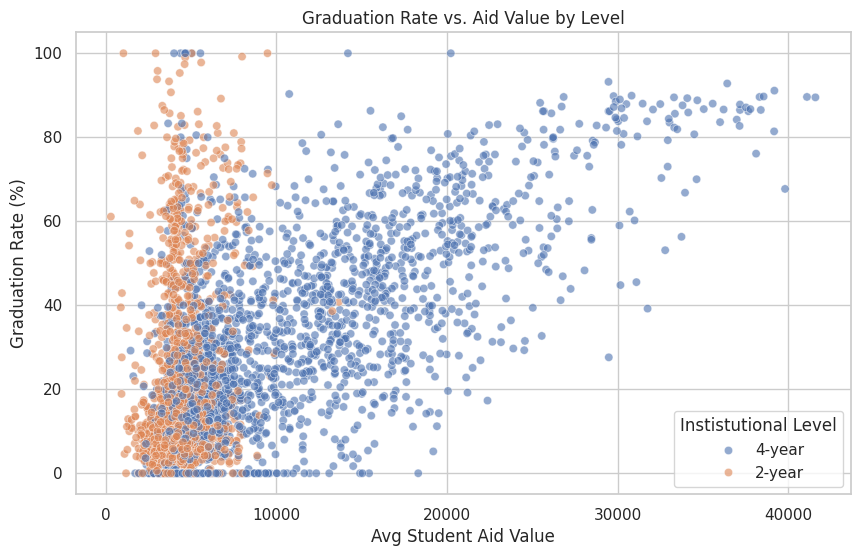

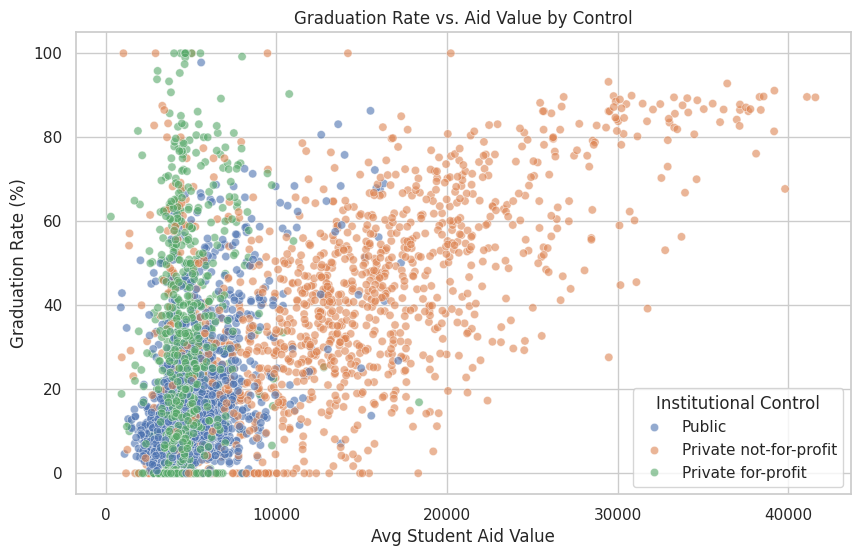

In [ ]:
#Part 8: Scatterplot Analysis

import seaborn as sns
import matplotlib.pyplot as plt

#Scatterplot of grad value vs. aid valud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='grad_100_value', x='aid_value', alpha=0.6)
plt.ylabel('Graduation Rate (%)')
plt.xlabel('Avg Student Aid Value')
plt.title('Scatterplot of Graduation Rate vs. Aid Value')
plt.show()

#I see a general postive correlation between aidvalue and graduation rate.
#This shows that institutions ofering higher student air tend to have higher
#graudation rates, but the relationship is scattered with outliers.
#I also see a big concertration of points around 50,000.

#Scatterplot Grouped by Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='grad_100_value', x='aid_value', alpha=0.6, hue='level')
plt.ylabel('Graduation Rate (%)')
plt.xlabel('Avg Student Aid Value')
plt.title('Graduation Rate vs. Aid Value by Level')
plt.legend(title='Instistutional Level')
plt.show()

#Scatterplot grouped by control
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='grad_100_value', x='aid_value', alpha=0.6, hue='control')
plt.ylabel('Graduation Rate (%)')
plt.xlabel('Avg Student Aid Value')
plt.title('Graduation Rate vs. Aid Value by Control')
plt.legend(title='Institutional Control')
plt.show()

#For the gouped by level scatterpolt I see 4-yr schools show a stronger positive
#trend with higher aid values that often correlate with higher grad rates.
#The 2-yr schools show a weaker correlation, as more factors like part-time
#enrollment play a role.

#For the grouped by control its clear that private not-for-profit schools
#often clusterwith higher aid values and higher grad rates. Public schools show
#a wider range but still show a postive trend. Private for-profit schools show
#lower grad rates despite some having higher aid.

# For 4-year private not-for-profit instutions aid seems to increase grad rates.

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.